# Matplotlib Tutorial

A library for creating plots in python. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Line Plots

Used to display information as a series of data points connected by straight lines.

We will be using `plt.subplots` function to create plots. This can also be used to plot multiple plots in a single figure.

In [2]:
## Signature of plt.subplots function

plt.subplots?

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

### Sin Wave

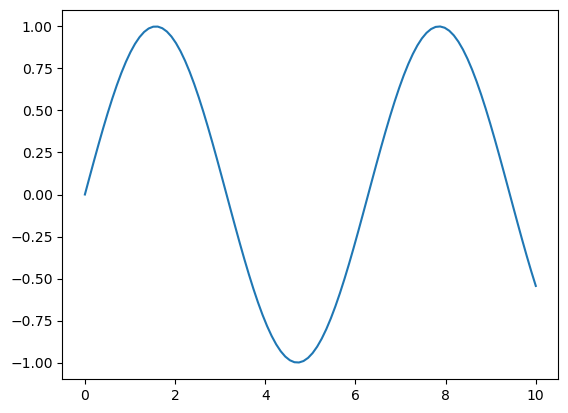

In [3]:
# Create a figure and axis
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot y = sin(x) on the ax object
ax.plot(x, y)

### Adding Label, Title and Grid

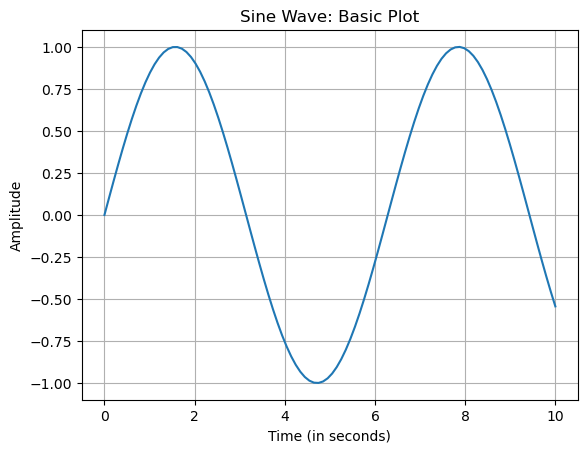

In [4]:
# Create a figure and axis
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot y = sin(x) on the ax object
ax.plot(x, y)

# Add title and labels
ax.set_title("Sine Wave: Basic Plot")
ax.set_xlabel("Time (in seconds)")
ax.set_ylabel("Amplitude")

# Add grid for better visibility of the plot
ax.grid(True)

## Organizing The Plots

### Multiple plots on the same figure

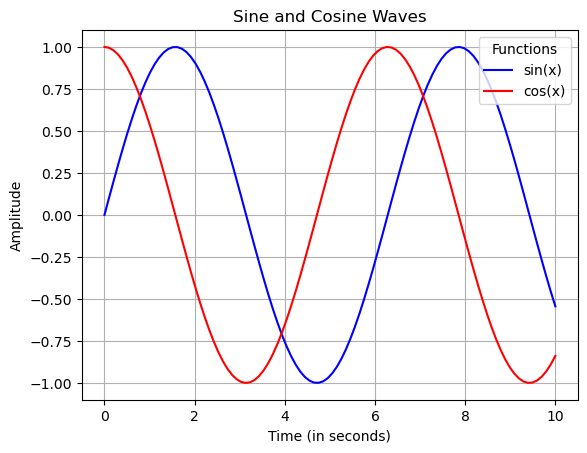

In [5]:
# Create a figure and axis
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot y = sin(x) on the ax object with label
ax.plot(x, y1, label="sin(x)", color='b')

# Plot y = cos(x) on the ax object with label corresponding to same x values
ax.plot(x, y2, label="cos(x)",color='r')

# Add title and labels
ax.set_title("Sine and Cosine Waves")
ax.set_xlabel("Time (in seconds)")
ax.set_ylabel("Amplitude")

# Add legend to distinguish the curves
ax.legend(loc="upper right", title="Functions")

# Add grid for better visibility
ax.grid(True)

# Display the plot
plt.show()

In [6]:
## More about legends

ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for all
    artist

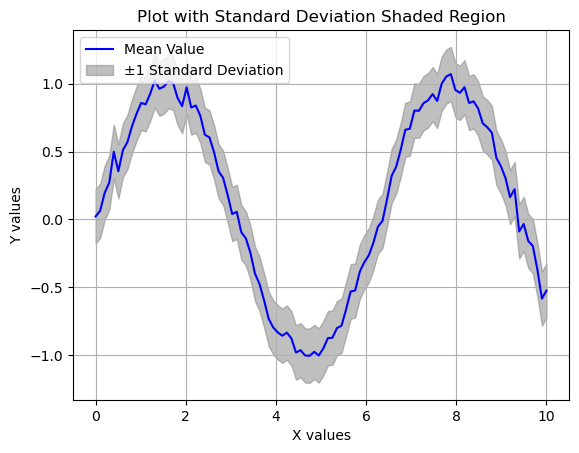

In [7]:
x = np.linspace(0, 10, 100)
# Example mean values (a sine wave with some noise)
y_mean = np.sin(x) + np.random.randn(len(x)) * 0.05
# Example standard deviation values (can be constant or vary along x)
y_std = np.full_like(y_mean, 0.2) # constant std dev of 0.2

# Calculate upper and lower bounds
y_upper_bound = y_mean + y_std
y_lower_bound = y_mean - y_std

# Plot the mean line
plt.plot(x, y_mean, color='blue', label='Mean Value')

# Use fill_between to shade the standard deviation area
plt.fill_between(x, y_lower_bound, y_upper_bound, color='gray', alpha=0.5, label='±1 Standard Deviation')

# Add labels, legend, and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plot with Standard Deviation Shaded Region")
plt.legend(loc='upper left')
plt.grid(True)


### Multiple plots in the same figure

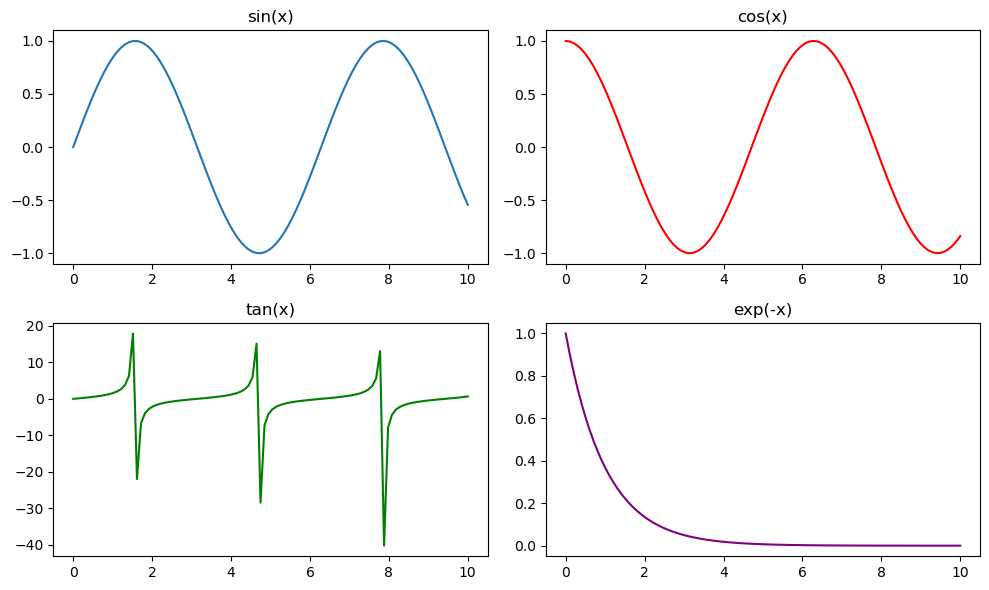

In [8]:
x = np.linspace(0, 10, 100)

# Create a figure with 4 subplots arranged in a 2x2 grid
# figsize is in inches by default, we can change the units too by multiplying with
# scaling factors.
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows, 2 columns

# First subplot: sin(x)
axes[0, 0].plot(x, np.sin(x))
axes[0, 0].set_title("sin(x)")

# Second subplot: cos(x)
axes[0, 1].plot(x, np.cos(x), color='red')
axes[0, 1].set_title("cos(x)")

# Third subplot: tan(x)
axes[1, 0].plot(x, np.tan(x), color='green')
axes[1, 0].set_title("tan(x)")

# Fourth subplot: exp(-x)
axes[1, 1].plot(x, np.exp(-x), color='purple')
axes[1, 1].set_title("exp(-x)")

fig.tight_layout()

In [9]:
# Above same plot using pandas

# Create a pandas DataFrame with the sine, cosine, and tangent values
df = pd.DataFrame({
    "sin(x)": np.sin(x),
    "cos(x)": np.cos(x),
    "tan(x)": np.tan(x),
    "exp(-x)": np.exp(-x)
}, index=x)

df.head()

,sin(x),cos(x),tan(x),exp(-x)
0.00000,0.000000,1.000000,0.000000,1.000000
0.10101,0.100838,0.994903,0.101355,0.903924
0.20202,0.200649,0.979663,0.204814,0.817078
0.30303,0.298414,0.954437,0.312660,0.738577
0.40404,0.393137,0.919480,0.427564,0.667617


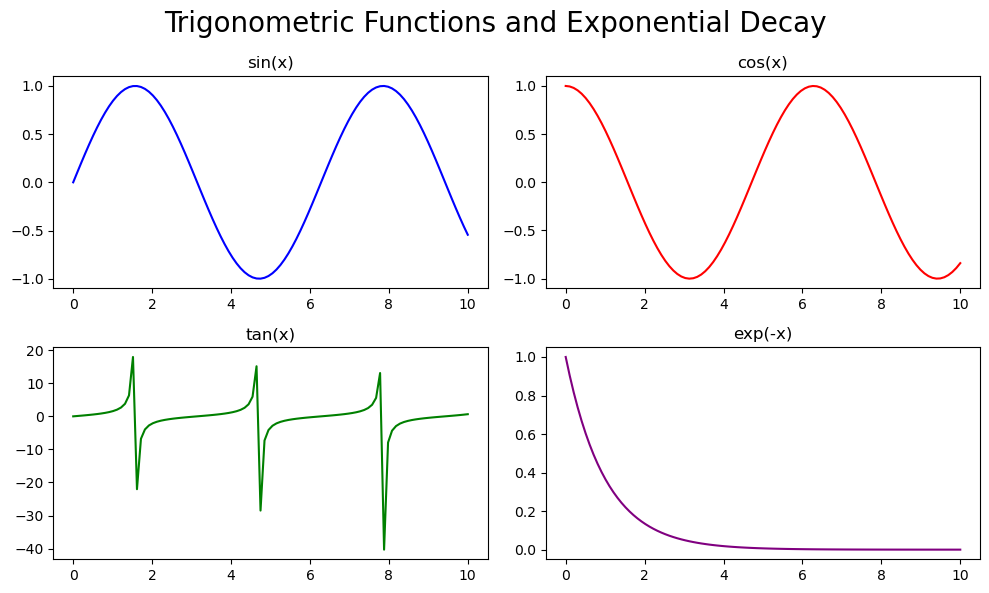

In [10]:
# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # 2 rows, 2 columns

# Plot each column of the DataFrame on a separate subplot
df["sin(x)"].plot(ax=axes[0, 0], color='blue', title="sin(x)")
df["cos(x)"].plot(ax=axes[0, 1], color='red', title="cos(x)")
df["tan(x)"].plot(ax=axes[1, 0], color='green', title="tan(x)")
df["exp(-x)"].plot(ax=axes[1, 1], color='purple', title="exp(-x)")

# Add super title to the figure
fig.suptitle("Trigonometric Functions and Exponential Decay", fontsize=20)

fig.tight_layout()

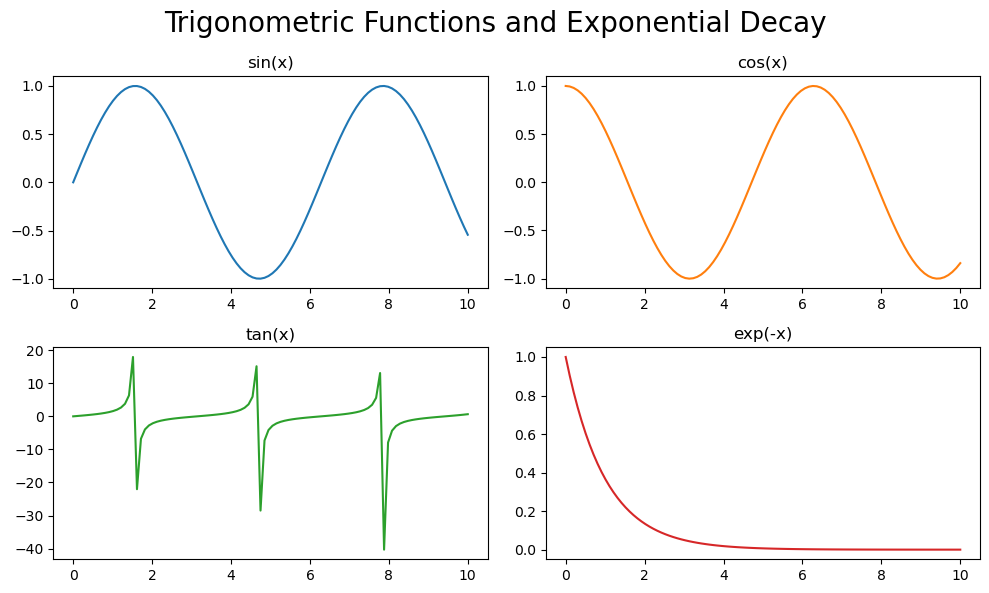

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

df.plot(subplots=True, ax=axes, figsize=(10, 6),
         title=["sin(x)", "cos(x)", "tan(x)", "exp(-x)"]
         ,legend=False)


# Add super title to the figure
fig.suptitle("Trigonometric Functions and Exponential Decay", fontsize=20)

fig.tight_layout()

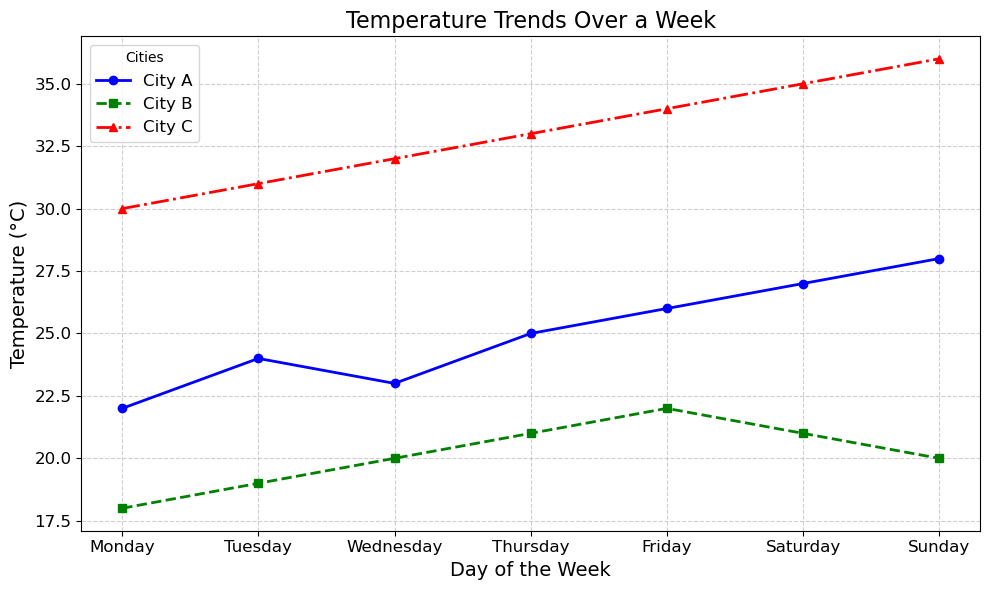

In [12]:
## Other Tweakings


# Daily temperature variations (in °C) over a week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
city_a = [22, 24, 23, 25, 26, 27, 28]  # City A temperatures
city_b = [18, 19, 20, 21, 22, 21, 20]  # City B temperatures
city_c = [30, 31, 32, 33, 34, 35, 36]  # City C temperatures

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot trends with customizations
ax.plot(days, city_a, color='blue', linestyle='-', linewidth=2, marker='o', label='City A')
ax.plot(days, city_b, color='green', linestyle='--', linewidth=2, marker='s', label='City B')
ax.plot(days, city_c, color='red', linestyle='-.', linewidth=2, marker='^', label='City C')

# Add title and labels
ax.set_title("Temperature Trends Over a Week", fontsize=16)
ax.set_xlabel("Day of the Week", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)

# Customize ticks
ax.set_xticks(days)  # Use day names for x-axis
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend
ax.legend(fontsize=12, title="Cities")

# Add grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()

### Saving the plots

In [13]:
# Save the plot as a PNG file
fig.savefig("temperature_variations.png", dpi=300, bbox_inches='tight')

# Save the plot as a PDF file
fig.savefig("temperature_variations.pdf", dpi=300, bbox_inches='tight')

# Save the plot as an SVG file
fig.savefig("temperature_variations.svg", dpi=300, bbox_inches='tight')

## Other plots types


Let us download some data. Check how the data looks like

In [14]:
url = "https://raw.githubusercontent.com/seandhan/Used-Car-Price-Prediction/refs/heads/main/data/cleaned_used_cars_data.csv"
## bash commands in the notebook
!wget -q https://raw.githubusercontent.com/seandhan/Used-Car-Price-Prediction/refs/heads/main/data/cleaned_used_cars_data.csv
!head -n 5 cleaned_used_cars_data.csv

car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
AMBASSADOR CLASSIC,16,AMBASSADOR,CLASSIC,NOVA DIESEL,1489.0,Diesel,80000,Chennai,12.8,kmpl,Third,35.5,1.35,South,5.0,Manual,2003
AUDI A3,5,AUDI,A3,35 TDI ATTRACTION,1968.0,Diesel,79271,Chennai,20.38,kmpl,First,143.0,16.5,South,5.0,Automatic,2014
AUDI A3,2,AUDI,A3,35 TDI TECHNOLOGY,1968.0,Diesel,22000,Delhi,20.38,kmpl,Second,143.0,22.5,North,5.0,Automatic,2017
AUDI A3,3,AUDI,A3,35 TDI PREMIUM,1968.0,Diesel,20003,Mumbai,20.38,kmpl,First,143.0,19.25,West,5.0,Automatic,2016


Checking documentation

In [15]:
Data = pd.read_csv(url)
Data.head()

,car_name,car_age,car_make,car_model,car_spec,engine,fuel_type,kilometers_driven,location,mileage,mileage_unit,owner_type,power,price,region,seats,transmission,year
0,AMBASSADOR CLASSIC,16,AMBASSADOR,CLASSIC,NOVA DIESEL,1489.0,Diesel,80000,Chennai,12.80,kmpl,Third,35.5,1.35,South,5.0,Manual,2003
1,AUDI A3,5,AUDI,A3,35 TDI ATTRACTION,1968.0,Diesel,79271,Chennai,20.38,kmpl,First,143.0,16.50,South,5.0,Automatic,2014
2,AUDI A3,2,AUDI,A3,35 TDI TECHNOLOGY,1968.0,Diesel,22000,Delhi,20.38,kmpl,Second,143.0,22.50,North,5.0,Automatic,2017
3,AUDI A3,3,AUDI,A3,35 TDI PREMIUM,1968.0,Diesel,20003,Mumbai,20.38,kmpl,First,143.0,19.25,West,5.0,Automatic,2016
4,AUDI A3,3,AUDI,A3,35 TDI PREMIUM PLUS,1968.0,Diesel,39000,Mumbai,20.38,kmpl,First,143.0,18.90,West,5.0,Automatic,2016


### Bar plots

In [16]:
# Count occurrences of each fuel type
fueltype_counts = Data['fuel_type'].value_counts()
fueltype_counts

fuel_type
Diesel    3205
Petrol    2745
CNG         56
LPG         10
Name: count, dtype: int64

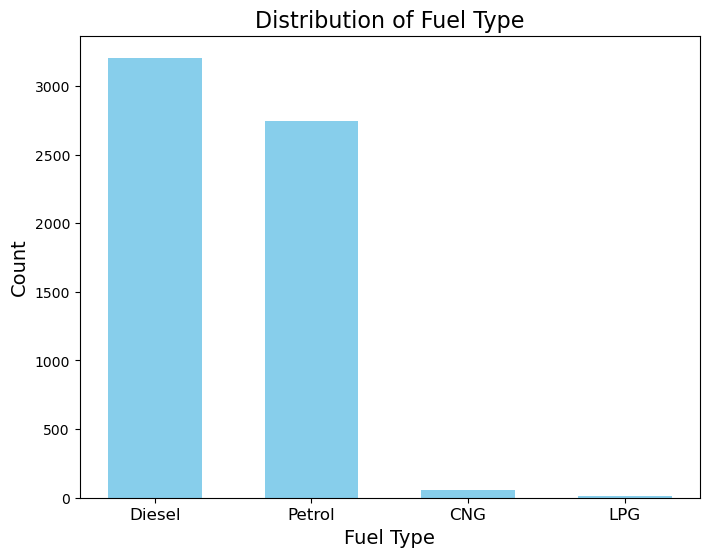

In [17]:
# Parameters for bar color and width
bar_color = ['skyblue']  # Example color list, you can change it to any color you prefer
bar_width = 0.6

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(fueltype_counts.index, fueltype_counts.values, color=bar_color, width=bar_width)

ax.set_title('Distribution of Fuel Type', fontsize=16)
ax.set_xlabel('Fuel Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticks(range(len(fueltype_counts.index)))
ax.set_xticklabels(fueltype_counts.index, fontsize=12)
# ax.set_yscale('log')

plt.show()

<Axes: title={'center': 'Distribution of Fuel Type'}, xlabel='Fuel Type', ylabel='Count'>

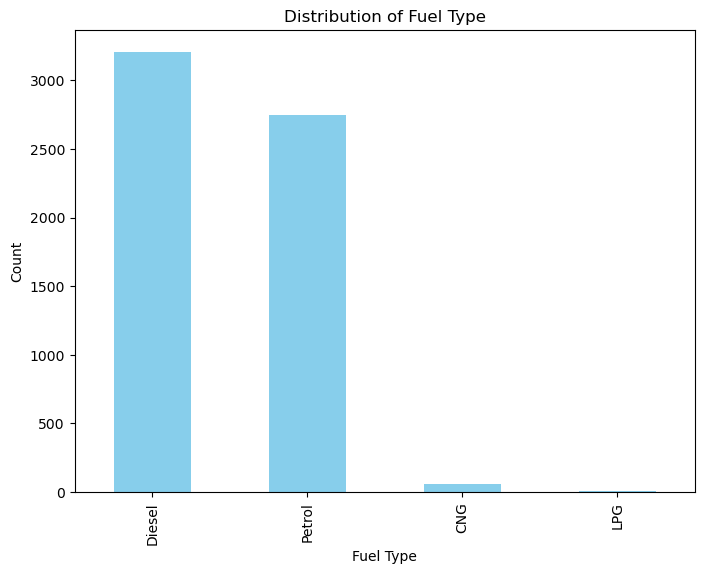

In [18]:
# In pandas
fueltype_counts.plot(kind='bar', color='skyblue', 
                     figsize=(8, 6),
                     xlabel='Fuel Type', ylabel='Count'
                     , title='Distribution of Fuel Type')

### Scatterplot

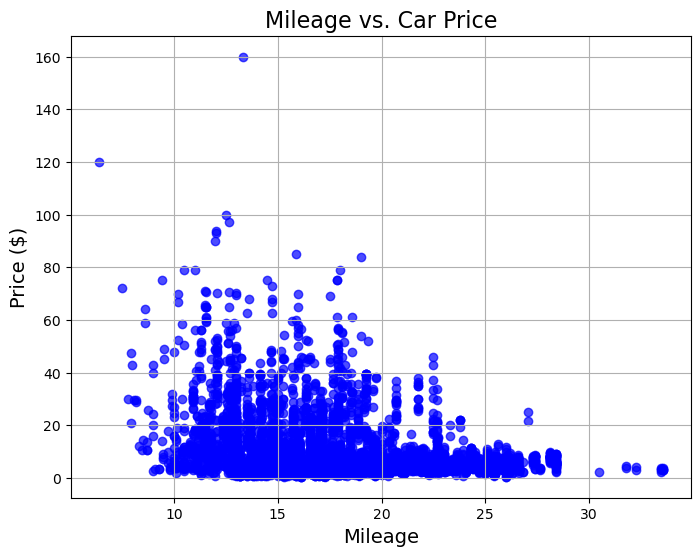

In [20]:
x = Data['mileage']
y = Data['price']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, color='blue', alpha=0.7)

ax.set_title('Mileage vs. Car Price', fontsize=16)
ax.set_xlabel('Mileage', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=14)

ax.grid(True)

### Pie chart

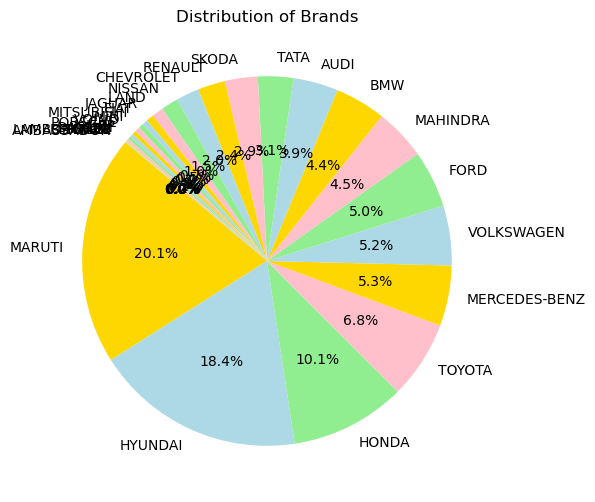

In [25]:
# Count occurrences of each brands
brand_counts = Data['car_make'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

sizes = brand_counts.values
labels = brand_counts.index
colors = ['gold', 'lightblue', 'lightgreen', 'pink']  # Adjust colors as needed

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

ax.set_title("Distribution of Brands")

plt.show()

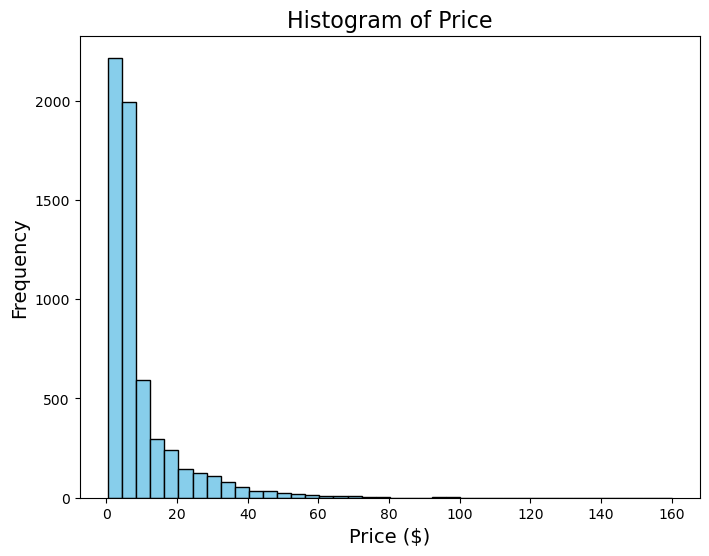

In [22]:


fig, ax = plt.subplots(figsize=(8, 6))

data = Data['price']

ax.hist(data, bins=40, color='skyblue', edgecolor='black')

ax.set_title('Histogram of Price', fontsize=16)
ax.set_xlabel('Price ($)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

plt.show()

## Show Image like data using imshow

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
data = np.random.rand(10, 10)

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9
0,0.444810,0.375749,0.743133,0.600725,0.280719,0.080846,0.574830,0.492174,0.411619,0.291957
1,0.157337,0.406081,0.295838,0.275856,0.906886,0.446253,0.010058,0.220467,0.717765,0.677688
2,0.413142,0.052036,0.961363,0.856637,0.595213,0.599430,0.347887,0.494605,0.970113,0.297918
3,0.921854,0.071932,0.037147,0.032617,0.912416,0.904221,0.470487,0.495340,0.289883,0.878286
4,0.262288,0.295817,0.383803,0.599395,0.518016,0.024122,0.670335,0.613101,0.485231,0.844223
5,0.035735,0.991290,0.086856,0.963020,0.690172,0.384959,0.491289,0.108418,0.234910,0.269888
6,0.531659,0.356787,0.603739,0.556392,0.039905,0.238563,0.642752,0.338346,0.231321,0.626744
7,0.626717,0.806766,0.032710,0.994619,0.431760,0.175181,0.885776,0.240443,0.370755,0.706368
8,0.363880,0.544930,0.486426,0.155453,0.007960,0.152690,0.719074,0.785851,0.347756,0.321864
9,0.046749,0.683634,0.602123,0.473510,0.736119,0.765098,0.109227,0.502461,0.898782,0.478004


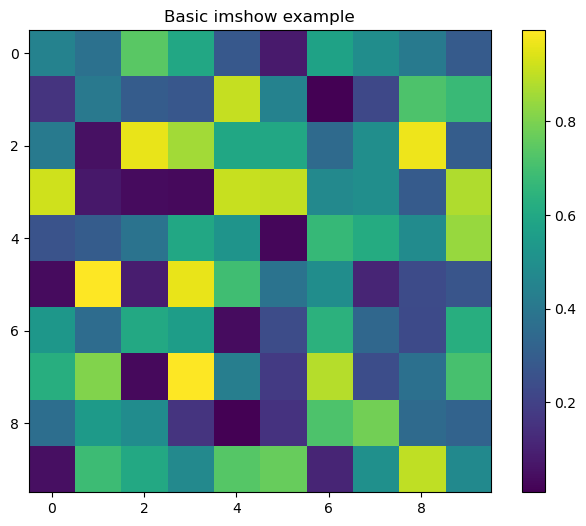

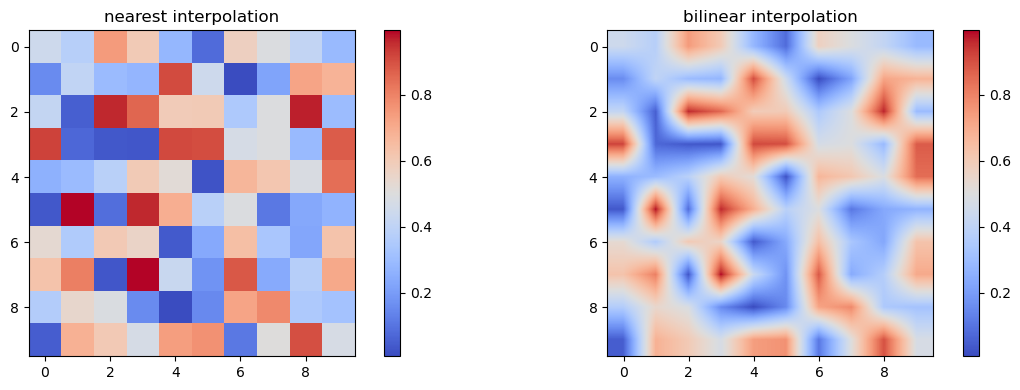

In [24]:


# Basic imshow example
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(data, cmap='viridis')
fig.colorbar(im, ax=ax)
ax.set_title('Basic imshow example')

# Multiple imshow with different interpolations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
im1 = ax1.imshow(data, interpolation='nearest', cmap='coolwarm')
ax1.set_title('nearest interpolation')
fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(data, interpolation='bilinear', cmap='coolwarm')
ax2.set_title('bilinear interpolation')
fig.colorbar(im2, ax=ax2)
fig.tight_layout()